# Machine Learning 
## Supervised Learning
## Project: Dynamic Pricing Model

Welcome to the  project of the Machine Learning ! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **

Given that in this problem we aren't trying to predict continuous values, this is clearly not regression. This problem comes under classification. The problem statement gives a big clue as to why - we need to identify whether a student needs early intervention or not. So there are clearly two labels, wither of which could apply to a student - (a)whether a student needs early intervention, OR (b) A student doesn't need early intervention.


## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [15]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

from IPython.display import display # Allows the use of display() for displaying DataFrames
pd.options.display.max_columns = None #Allows us to view all columns of a DataFrame

# Read vessel data
vessel_data = pd.read_csv("MarineOcc_Eng.csv")
print(" data read successfully!")

# Display the first five records
display(vessel_data.head(n=5))
#check whether columns is having any null or not
display(vessel_data.isnull().any())
# Some more additional data analysis
display(np.round(vessel_data.describe()))

 data read successfully!


,OccNo,OccYear,OccDate,OccClassID,OccurrenceType,OccSubType,AccIncType,AccIncSubType,Region,NearLocDescription,NearLocDistance,Latitude,Longitude,AreaType,PollutionIND,DGCargoReleaseIND,TotalFatalities,SeriousInjuries,NbVesselsInvolved,PrimaryVesselName,PrimaryVesselFlag,PrimaryVesselType,PrimaryVesselSubType,PrimaryVesselGrossTonnage,PrimaryVesselYearBuilt,PrimaryVesselYearRebuilt,PrimaryVesselPhase,PrimaryVesselActivityType,PrimaryVesselActivitySubType,PrimaryVesselLossIND,PRODUCTION_DT
0,M04L0001,2004,2004-01-01,5,INCIDENT,INCIDENT,INTENTIONAL BEACHING/GROUNDING/ANCHORING TO AV...,NaN,CENTRAL REGION,"CAP-AUX-OIES, QC",NaN,47.47555,-70.20833,RIVER,NO,NO,0,0,1,HALIFAX,CANADA,CARGO - SOLID,BULK CARRIER,20645.51,1963.0,1980.0,UNDERWAY - moving ahead,CARRIAGE OF GOODS,NaN,NO,2018-08-15T10:01:40
1,M04F0003,2004,2004-01-03,5,ACCIDENT,SHIPPING ACCIDENT,FIRE,NaN,FOREIGN WATERS,EAST COAST OF UNITED STATES,NaN,39.97500,-72.95500,AT SEA (GENERAL),NO,NO,0,0,1,THALASSA DESGAGNES,CANADA,CARGO - LIQUID,PRODUCT TANKER,5999.49,1976.0,NaN,UNDERWAY - moving ahead,CARRIAGE OF GOODS,NaN,NO,2018-08-15T10:01:40
2,M04L0004,2004,2004-01-03,5,ACCIDENT,SHIPPING ACCIDENT,MISSING (THE SHIP IS),NaN,CENTRAL REGION,"SECTION 64, PORT OF MONTREAL",NaN,45.57000,-73.51527,HARBOUR AREA,NO,NO,0,0,1,BORDEAUX,CANADA,BARGE - UNSPECIFIED,NaN,29.44,1957.0,NaN,BERTHED/DOCKED,NOT ENGAGED IN COMMERCIAL ACTIVITY,NaN,NO,2018-08-15T10:01:40
3,M04L0005,2004,2004-01-03,5,INCIDENT,INCIDENT,RISK OF STRIKING (NEAR ALLISION),RISK OF ALLISION WITH A FIXED OBJECT (STRIKING...,CENTRAL REGION,"SECTION 64, PORT OF MONTREAL",NaN,45.57000,-73.51527,HARBOUR AREA,NO,NO,0,0,1,MB 3,CANADA,BARGE - UNSPECIFIED,NaN,NaN,NaN,NaN,BERTHED/DOCKED,NOT ENGAGED IN COMMERCIAL ACTIVITY,NaN,NO,2018-08-15T10:01:40
4,M04W0001,2004,2004-01-03,5,ACCIDENT,SHIPPING ACCIDENT,COLLISION,WITH ANOTHER VESSEL OR OTHER FLOATING OBJECT,PACIFIC REGION,"CASCADIA DOCK, VANCOUVER, BC",NaN,49.29166,-124.03330,HARBOUR AREA,NO,NO,0,0,2,P.T. 36,CANADA,BARGE - UNSPECIFIED,NaN,1850.00,1990.0,NaN,UNDERWAY - unknown,SERVICE,"TOWING, ASSISTING",NO,2018-08-15T10:01:40


OccNo                           False
OccYear                         False
OccDate                         False
OccClassID                      False
OccurrenceType                  False
OccSubType                      False
AccIncType                      False
AccIncSubType                    True
Region                          False
NearLocDescription               True
NearLocDistance                  True
Latitude                         True
Longitude                        True
AreaType                         True
PollutionIND                    False
DGCargoReleaseIND               False
TotalFatalities                 False
SeriousInjuries                 False
NbVesselsInvolved               False
PrimaryVesselName               False
PrimaryVesselFlag                True
PrimaryVesselType                True
PrimaryVesselSubType             True
PrimaryVesselGrossTonnage        True
PrimaryVesselYearBuilt           True
PrimaryVesselYearRebuilt         True
PrimaryVesse

,OccYear,OccClassID,NearLocDistance,Latitude,Longitude,TotalFatalities,SeriousInjuries,NbVesselsInvolved,PrimaryVesselGrossTonnage,PrimaryVesselYearBuilt,PrimaryVesselYearRebuilt
count,11551.0,11551.0,4341.0,11549.0,11549.0,11551.0,11551.0,11551.0,10555.0,8940.0,408.0
mean,2012.0,5.0,15.0,48.0,-87.0,0.0,0.0,1.0,7205.0,1985.0,1988.0
std,4.0,0.0,33.0,4.0,30.0,0.0,0.0,0.0,20251.0,18.0,14.0
min,2004.0,2.0,0.0,-34.0,-158.0,0.0,0.0,1.0,0.0,1292.0,1943.0
25%,2008.0,5.0,1.0,45.0,-123.0,0.0,0.0,1.0,15.0,1974.0,1977.0
50%,2013.0,5.0,4.0,48.0,-73.0,0.0,0.0,1.0,100.0,1986.0,1989.0
75%,2015.0,5.0,14.0,50.0,-64.0,0.0,0.0,1.0,8448.0,1998.0,2000.0
max,2018.0,10.0,500.0,80.0,124.0,6.0,16.0,6.0,1422295.0,2017.0,2012.0


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


The dataset has 11551 rows and 31 columns


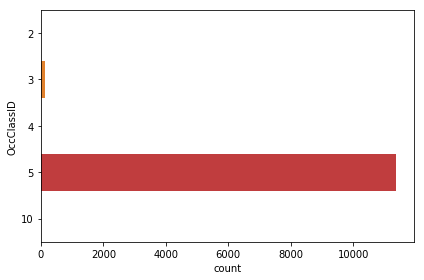

In [16]:
# TODO: Calculate number of rows
n_rows = vessel_data.shape[0]

# TODO: Calculate number of columns
n_columns = vessel_data.shape[1]

print("The dataset has {} rows and {} columns" .format(n_rows , n_columns))

sns.countplot(y = "OccClassID" , data = vessel_data )
plt.tight_layout()



## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

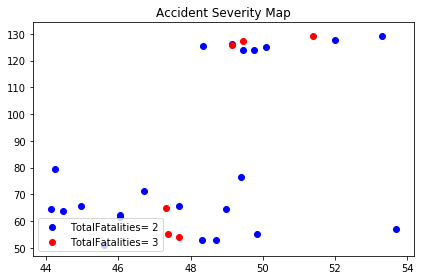

In [17]:
#plotting the dataset with a different color depending on the Casualities
df2 = vessel_data.loc[vessel_data["TotalFatalities"] == 2]
df3 = vessel_data.loc[vessel_data["TotalFatalities"] == 3]

xx2 , yy2 = df2["Latitude"] , -df2["Longitude"]
xx3 , yy3 = df3["Latitude"] , -df3["Longitude"]

pts2 = plt.scatter(xx2,yy2,color = 'b' )
pts3 = plt.scatter(xx3,yy3,color = 'r' )
plt.legend((pts2, pts3), ('TotalFatalities= 2', 'TotalFatalities= 3'),loc='lower left')
plt.title("Accident Severity Map")
plt.tight_layout()

In [18]:
# Extract feature columns
feature_cols = ['OccDate',  'OccYear', 'SeriousInjuries',  'TotalFatalities']

# Extract target column 'passed'
target_col = 'PrimaryVesselLossIND'

# Show the list of columns
print("Feature columns:\n{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = vessel_data[feature_cols]
y_all = vessel_data[target_col]

# Show the feature information by printing the first five rows
print("\nFeature values:")
display(X_all.head())

Feature columns:
['OccDate', 'OccYear', 'SeriousInjuries', 'TotalFatalities']

Target column: PrimaryVesselLossIND

Feature values:


,OccDate,OccYear,SeriousInjuries,TotalFatalities
0,2004-01-01,2004,0,0
1,2004-01-03,2004,0,0
2,2004-01-03,2004,0,0
3,2004-01-03,2004,0,0
4,2004-01-03,2004,0,0


### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [19]:
def preprocess_features(X):
    ''' Preprocesses the  data and converts N/A variables into
        Numberic 0 variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index) #Empty DataFrame with range equal to X

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
          
        # print("col is ", col)
        
       
        # If data type is non-numeric, replace all yes/no values with 1/0
       
        if col == 'OccDate':
           col_data = col_data.apply(lambda x:int(x[5:7]))
           #print("col_data is ", col_data)
        
            
            

        # If data type is categorical, convert to dummy variables
        #if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
         #   col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
       
    
    return output


X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (4 total features):
['OccDate', 'OccYear', 'SeriousInjuries', 'TotalFatalities']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [26]:
# TODO: Import any additional functionality you may need here

# Import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train = None
X_test = None
y_train = None
y_test = None

# Split the 'features' and labels data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, 
                                                    y_all, 
                                                    test_size = 95, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 11456 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

**Gaussian Naive Bayes**

* Can be used to mark emails as spam or not spam. Or classifying news articles
* Performs well in classification problems, especially in supervised learning
* The assumptions that Naive Bayes makes in conditional probabilities can often be inaccurate. It assumes that all features are independent of each other, while in the real world lot of these features can be dependent on each other
* The data-set is not extremely large, and Gaussian Naive Bayes performs well under these conditions. Moreover, it's easy to train the classifier given that the set of features are not very large

**Decision Trees**

* Used in situations where the outputs are non binary. Can also be used in classification problems
* Relatively easier to understand and interpret, since it is a 'white box' model
* Prone to information gain, leading to high bias for some attributes
* With the given data-set, there might be features that do not interact linearly. Decision trees can perform well in this regard. Moreover, combined with ensemble methods like bagging and boosting, they can be quite effective

**Random forest**

* Used for solving some of the overfitting problems in decision trees and other ML algorithms
* Can handle non-binary classification problems quite well. Quite fast to train
* With random sampling, all features might be treated equally and contribute to the final outcome
* With this given data-set, random forest can be faster to train, can also handle large number of training examples

**Support Vector Machines**

* Used in text classification problems, face detection and in the health industry
* Performs quite well in classification problems, and better than logistical regression methods. Guarantees to reach the global minimum rather than local minimum
* Doesn't take into account the structure of the data or its order. Training time can get high with large datasets
* It's less prone to overfitting some of the features in the data-set, and it can generalize well

Sources:

* [http://www.cs.cornell.edu/~caruana/ctp/ct.papers/caruana.icml06.pdf](http://www.cs.cornell.edu/~caruana/ctp/ct.papers/caruana.icml06.pdf)

* [https://en.wikipedia.org/wiki/Naive_Bayes_classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

* [https://en.wikipedia.org/wiki/Information_gain_in_decision_trees](https://en.wikipedia.org/wiki/Information_gain_in_decision_trees)

* [https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms](https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms)


### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [29]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock 

    start = time()
    clf.fit(X_train , y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    return printScores(target.values, y_pred, 'yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))
    
    
def printScores(y_test, y_pred, classif_name):  
    print("--------------  "  + classif_name + "  ------------------" )
    print("recall : %0.2f" %  recall_score(y_test, y_pred))
    print("precision : %0.2f" %  precision_score(y_test, y_pred)) 
    print("f1 : %0.2f" %  f1_score(y_test, y_pred))
    print("accuracy : %0.2f" %  accuracy_score(y_test, y_pred))  
    print("---------------------------------------------------")

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [30]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
# from sklearn import model_B
# from sklearn import model_C
#from sklearn.naive_bayes import GaussianNB
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# TODO: Initialize the three models
#clf_A = GaussianNB()
#clf_B = DecisionTreeClassifier(max_depth=None, random_state=None)
clf_C = RandomForestClassifier(max_depth=None, random_state=None)

#le.fit(clf_C)


# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

X_samples = [X_train_100, X_train_200, X_train_300]
y_samples = [y_train_100, y_train_200, y_train_300]
# TODO: Execute the 'train_predict' function for each classifier and each training set size
for clf in [clf_C]:
    clf_name = clf.__class__.__name__
    
    for i, samples in enumerate(X_samples):
        train_predict(clf, samples, y_samples[i], X_test, y_test)

        
#train_predict(clf, X_train, y_train, X_test, y_test)

Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0117 seconds
Made predictions in 0.0012 seconds.
--------------  yes  ------------------


/home/webruster/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1030: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(['NO', 'YES'], dtype='<U3')

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - ?**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0012           |        0.003           |      0.8550      |    0.7481       |
| 200               |        0.0008           |        0.0003          |      0.8321      |    0.71         |
| 300               |       0.0011            |        0.0005          |      0.8088      |    0.7500       |

** Classifer 2 - ?**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0009              |     0.0006             |      1           |     0.7009      |
| 200               |     0.0012              |     0.0002             |      1           |     0.7031      |
| 300               |    0.0016               |       0.0002           |      1           |      0.7167     |

** Classifer 3 - ?**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0086           |       0.0008           |       0.9922     |   0.6942        |
| 200               |        0.0088           |       0.0007           |       1          |   0.7368        |
| 300               |        0.0090           |       0.0008           |       0.9952     |   0.7939        |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

Based on the results, I most definitely believe that a random forest model will be most appropriate for this task. When 100% of the training data is used, The F score for Random forest is higher (0.794) compared to other models (Decision trees - 0.716 and Gaussian Naive Bayes - 0.75). Based on these factors, random forest is better suited to make predictions. It performs fairly well and the training time and prediction times are on acceptable levels.


### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

In order to understand how Random Forest works, we need to understand how a Decision Tree Classifier works.

A Decision Tree Classifier basically asks a series of Yes or No Questions, and based on the responses, it arrives at the final decision/result/outcome. It's basically like playing a game of 20 questions. Assuming that in this game the task is to predict what person/object are you thinking about, I start to ask a series of Yes/No type questions. Now, if the first question that I ask is - "are you thinking of a potato", that would be pretty much useless. Instead, if the question that I ask is "Is it a person", then that reveals much more information. This way, every question that I ask would be about maximizing the "Information Gain", each successfully bringing me closer and closer to the final prediction. The Decision Tree works exactly this way, using the features in the data-set to form its series of Yes/No questions.

A decision tree is prone to making mistakes, or overfitting. A random forest works by collecting the results of multiple decision tree classifiers and averaging their results. The majority vote of the collection of decision trees is considered to be the final prediciton.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [23]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators': [10, 20, 30], 'max_features':[3,4,5, None], 'max_depth': [5,6,7, None]}

# TODO: Initialize the classifier
clf = RandomForestClassifier(max_depth=None, random_state=None)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, average="micro")

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))

ValueError: max_features must be in (0, n_features]

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: ** 

As it turns out, the final model's performance has infact slightly increased, though not by a huge margin. The final model's F1 score is 80.5%.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.